<a href="https://colab.research.google.com/github/Bharath-m10/NM_Bharath/blob/main/movie_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overall Problem Statement
In the digital era, users are overwhelmed by the vast and ever-growing number of movies available on streaming platforms like Netflix, Amazon Prime, and Disney+. While this abundance of content offers diverse choices, it also creates a significant challenge: finding the right movie that aligns with a user's taste without wasting time.

To address this issue, this project focuses on developing a Movie Recommendation System using supervised machine learning techniques. The system is designed to predict user ratings for movies based on features like movie title, release year, and genres. By analyzing historical rating data and movie metadata, the model learns patterns that help it estimate how much a user would likely enjoy a given movie.

In addition to rating prediction, the project also implements a content-based recommendation engine, which suggests similar movies based on shared attributes like genres and release period. These recommendations can be served through a simple interactive web interface using Streamlit, allowing users to explore personalized suggestions in real time.

The system combines data preprocessing, feature engineering, model training, evaluation, and deployment, and it aims to enhance user experience, reduce content fatigue, and provide a scalable solution for personalized movie recommendations.



In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#loading the dataset
movies=pd.read_csv("movies.csv")

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


#  Handling Missing Values

In [ ]:
movies.isnull().sum()

,0
movieId,0
title,0
genres,0


In [ ]:
movies.describe()

,movieId
count,62423.000000
mean,122220.387646
std,63264.744844
min,1.000000
25%,82146.500000
50%,138022.000000
75%,173222.000000
max,209171.000000


In [ ]:
ratings=pd.read_csv("ratings.csv")

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1.147880e+09
1,1,306,3.5,1.147869e+09
2,1,307,5.0,1.147869e+09
3,1,665,5.0,1.147879e+09
4,1,899,3.5,1.147869e+09


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14099221 entries, 0 to 14099220
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  float64
dtypes: float64(2), int64(2)
memory usage: 430.3 MB


In [ ]:
ratings.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,1


In [ ]:
ratings.describe()

,userId,movieId,rating,timestamp
count,1.409922e+07,1.409922e+07,1.409922e+07,1.409922e+07
mean,4.584414e+04,2.153113e+04,3.532242e+00,1.215547e+09
std,2.626387e+04,3.944369e+04,1.061481e+00,2.269211e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,2.325900e+04,1.197000e+03,3.000000e+00,1.012279e+09
50%,4.570200e+04,2.949000e+03,3.500000e+00,1.197211e+09
75%,6.863300e+04,8.636000e+03,4.000000e+00,1.447325e+09
max,9.141100e+04,2.091630e+05,5.000000e+00,1.574328e+09


# Removing Duplicate Records

In [ ]:
#checking duplicates
print(movies.duplicated().sum())
print(ratings.duplicated().sum())

0
0


# Detecting and Treating Outliers

In [ ]:
# Rating distribution
print(ratings['rating'].describe())

count    1.409922e+07
mean     3.532242e+00
std      1.061481e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


# Convert Data Types and Ensure Consistency

In [ ]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)', expand=False)

# Convert 'year' to integer
movies['year'] = movies['year'].dropna().astype(int)

In [ ]:
# Merge movies and ratings on movieId
data = pd.merge(movies, ratings, on='movieId')

In [ ]:
data

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,2,3.5,1.141416e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3,4.0,1.439472e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,4,3.0,1.573944e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,5,4.0,8.586259e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,8,4.0,8.904925e+08
...,...,...,...,...,...,...,...
2604157,209049,No Safe Spaces (2019),Documentary,2019.0,14059,4.5,1.573965e+09
2604158,209053,Bowling (2012),Comedy,2012.0,15152,3.5,1.574008e+09
2604159,209055,"Very Well, Thank You (2007)",Comedy|Drama,2007.0,15152,3.5,1.574008e+09
2604160,209103,Tsar Ivan the Terrible (1991),(no genres listed),1991.0,13737,4.0,1.574112e+09


# Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encoding movie titles
le = LabelEncoder()
data['title'] = le.fit_transform(data['title'])

In [ ]:
# genres were separated by '|', first split them
movies['genres'] = movies['genres'].str.split('|')
movies_exploded = movies.explode('genres')

# Merge exploded genres with ratings
data = pd.merge(movies_exploded, ratings, on='movieId')

# One-Hot Encoding
data = pd.get_dummies(data, columns=['genres'])

In [ ]:
# Fit and transform the 'title' column
data['title'] = le.fit_transform(data['title'])

In [ ]:
data

,movieId,title,year,userId,rating,timestamp,genres_(no genres listed),genres_Action,genres_Adventure,genres_Animation,...,genres_Film-Noir,genres_Horror,genres_IMAX,genres_Musical,genres_Mystery,genres_Romance,genres_Sci-Fi,genres_Thriller,genres_War,genres_Western
0,1,27241,1995.0,2,3.5,1.141416e+09,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,1,27241,1995.0,3,4.0,1.439472e+09,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1,27241,1995.0,4,3.0,1.573944e+09,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,1,27241,1995.0,5,4.0,8.586259e+08,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1,27241,1995.0,8,4.0,8.904925e+08,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7080919,209055,28169,2007.0,15152,3.5,1.574008e+09,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7080920,209055,28169,2007.0,15152,3.5,1.574008e+09,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7080921,209103,27514,1991.0,13737,4.0,1.574112e+09,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7080922,209163,2357,2018.0,6964,4.5,1.574285e+09,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#  Normalizing or Standardizing Features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scaling
data[['rating', 'year']] = scaler.fit_transform(data[['rating', 'year']])

In [ ]:
data

,movieId,title,year,userId,rating,timestamp,genres_(no genres listed),genres_Action,genres_Adventure,genres_Animation,...,genres_Film-Noir,genres_Horror,genres_IMAX,genres_Musical,genres_Mystery,genres_Romance,genres_Sci-Fi,genres_Thriller,genres_War,genres_Western
0,1,27241,0.005982,2,-0.046341,1.141416e+09,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,1,27241,0.005982,3,0.427300,1.439472e+09,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1,27241,0.005982,4,-0.519982,1.573944e+09,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,1,27241,0.005982,5,0.427300,8.586259e+08,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1,27241,0.005982,8,0.427300,8.904925e+08,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7080919,209055,28169,0.818271,15152,-0.046341,1.574008e+09,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7080920,209055,28169,0.818271,15152,-0.046341,1.574008e+09,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7080921,209103,27514,-0.264781,13737,0.427300,1.574112e+09,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7080922,209163,2357,1.562870,6964,0.900941,1.574285e+09,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Exploratory Data Analysis (EDA)


# Univariate Analysis

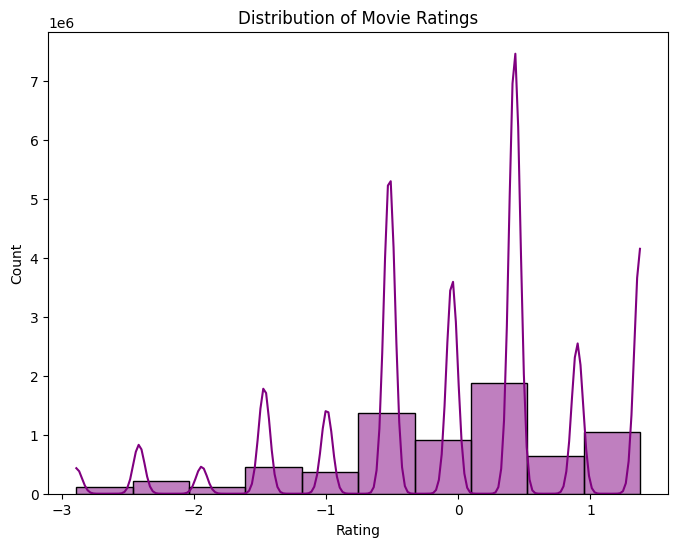

In [ ]:
#Rating Distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Plot Rating distribution
plt.figure(figsize=(8,6))
sns.histplot(data['rating'], bins=10, kde=True, color='purple')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

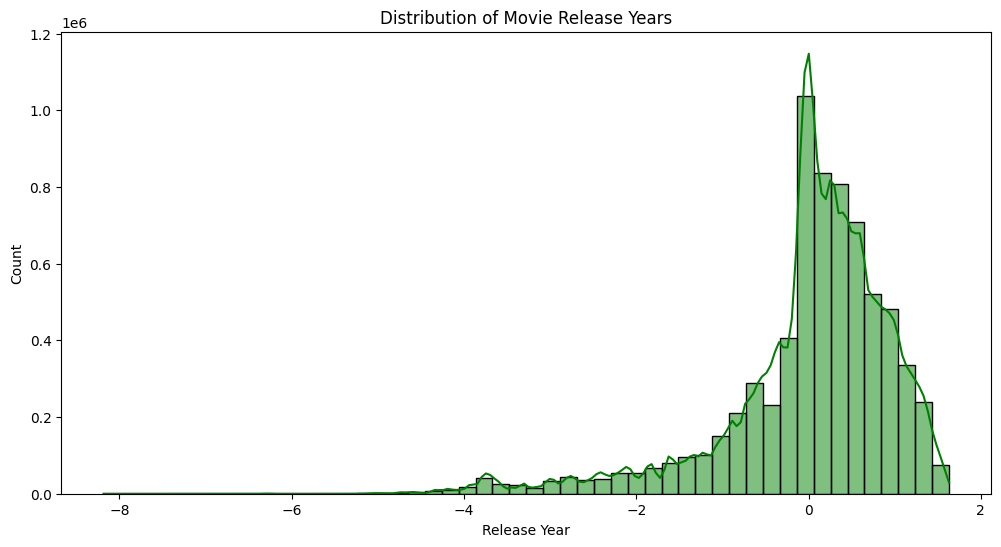

In [ ]:
#Year Distribution (Movies Release Year)


#Plot year distribution
plt.figure(figsize=(12,6))
sns.histplot(data['year'], bins=50, kde=True, color='green')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


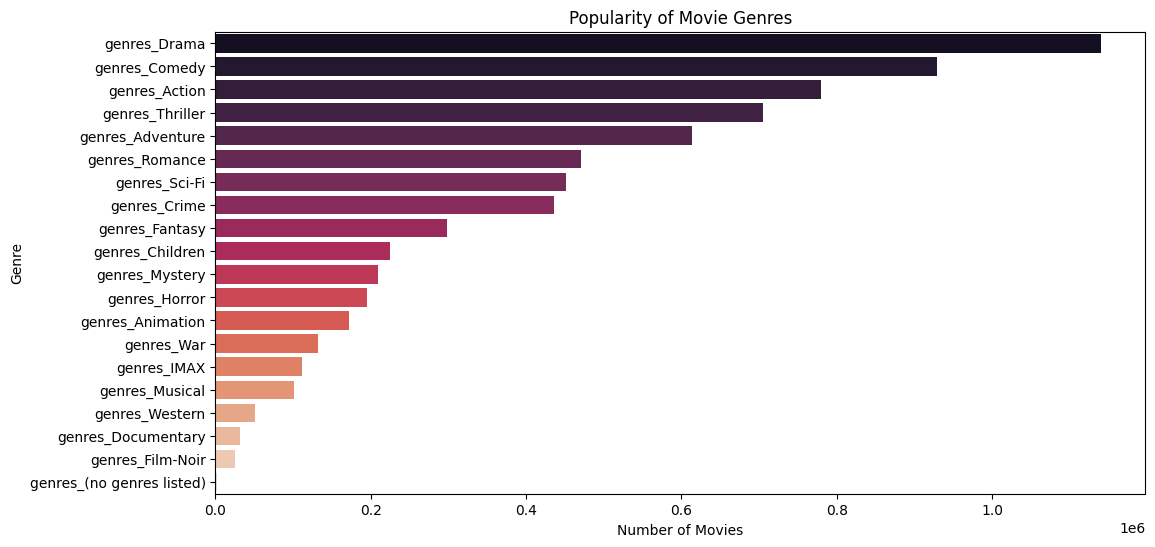

In [ ]:
#Genre Popularity

# Plot top genres count
genre_columns = [col for col in data.columns if 'genres_' in col]
genre_counts = data[genre_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='rocket')
plt.title('Popularity of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

#  Bivariate / Multivariate Analysis

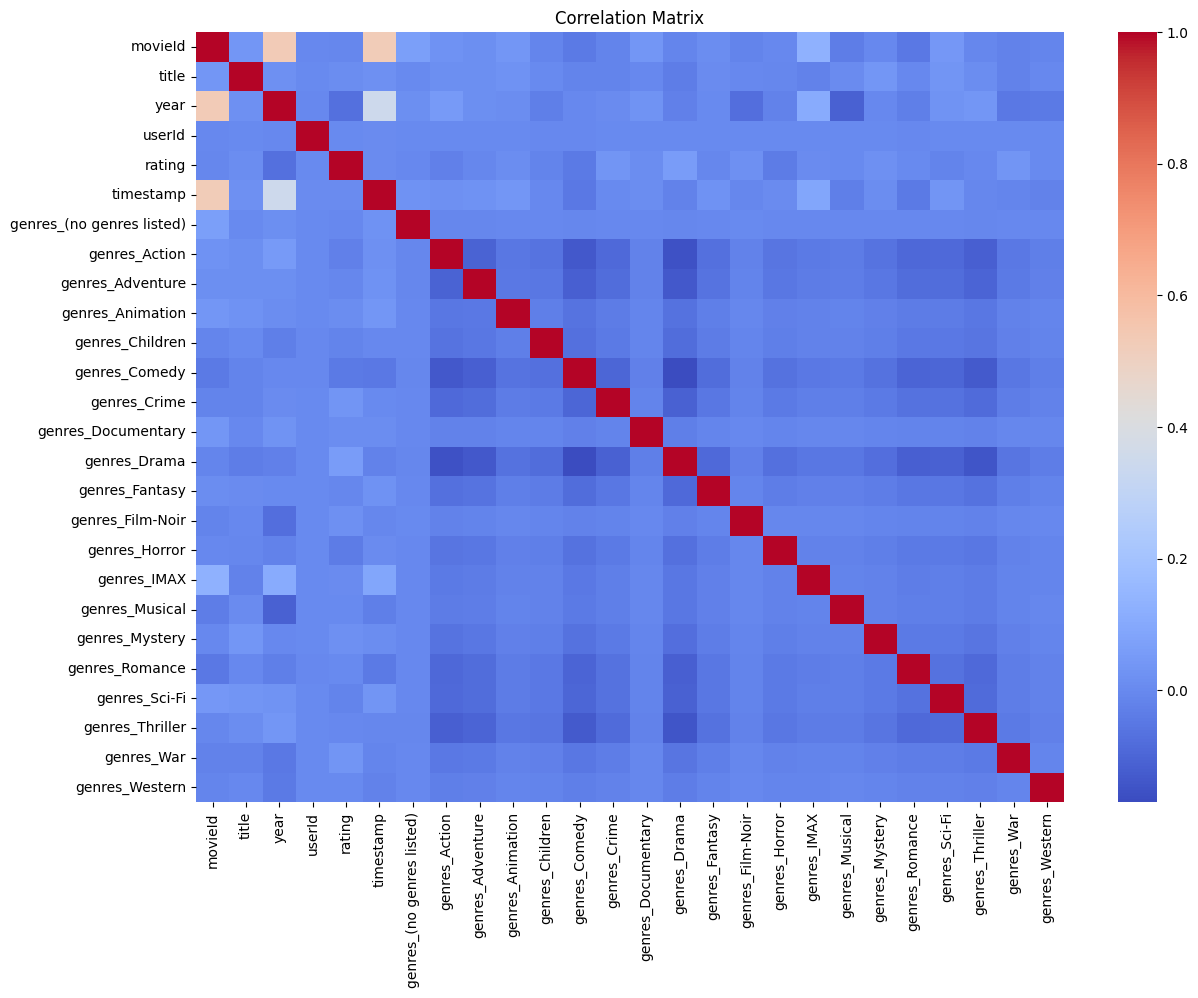

In [ ]:
#Correlation Matrix

# Correlation heatmap
plt.figure(figsize=(14,10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

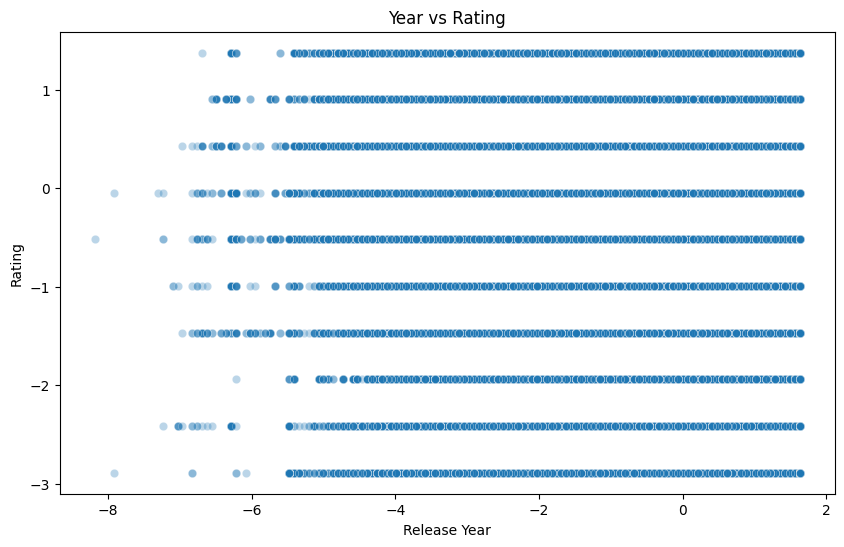

In [ ]:
# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['year'], y=data['rating'], alpha=0.3)
plt.title('Year vs Rating')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.show()

# Feature Engineering and Data Transformation


In [ ]:
#Binning Release Year into Eras (Optional)
# Create 'era' bins
bins = [1900, 1950, 1970, 1990, 2010, 2025]
labels = ['1900s-50s', '50s-70s', '70s-90s', '90s-2010', '2010s+']
data['year_bin'] = pd.cut(data['year'], bins=bins, labels=labels)

# One-hot encode era
data = pd.get_dummies(data, columns=['year_bin'])

In [ ]:
data

,movieId,title,year,userId,rating,timestamp,genres_(no genres listed),genres_Action,genres_Adventure,genres_Animation,...,genres_Romance,genres_Sci-Fi,genres_Thriller,genres_War,genres_Western,year_bin_1900s-50s,year_bin_50s-70s,year_bin_70s-90s,year_bin_90s-2010,year_bin_2010s+
0,1,27241,0.005982,2,-0.046341,1.141416e+09,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,1,27241,0.005982,3,0.427300,1.439472e+09,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1,27241,0.005982,4,-0.519982,1.573944e+09,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,1,27241,0.005982,5,0.427300,8.586259e+08,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1,27241,0.005982,8,0.427300,8.904925e+08,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7080919,209055,28169,0.818271,15152,-0.046341,1.574008e+09,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7080920,209055,28169,0.818271,15152,-0.046341,1.574008e+09,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7080921,209103,27514,-0.264781,13737,0.427300,1.574112e+09,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7080922,209163,2357,1.562870,6964,0.900941,1.574285e+09,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

,0
movieId,0
title,0
year,1976
userId,0
rating,0
timestamp,0
genres_(no genres listed),0
genres_Action,0
genres_Adventure,0
genres_Animation,0


In [ ]:
data['year'] = data['year'].fillna(data['year'].mode()[0])

In [ ]:
data.isnull().sum()

,0
movieId,0
title,0
year,0
userId,0
rating,0
timestamp,0
genres_(no genres listed),0
genres_Action,0
genres_Adventure,0
genres_Animation,0


#  Polynomial Features (Optional for Linear Regression)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Example with 2 features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data[['year', 'rating']])


# Dimensionality Reduction (Optional)
# Apply PCA (Principal Component Analysis)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numeric columns for PCA
X = data.select_dtypes(include=[np.number]).drop(columns=['userId', 'movieId'])

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% variance
X_pca = pca.fit_transform(X_scaled)

print(f"PCA reduced to {X_pca.shape[1]} features.")

PCA reduced to 4 features.


# Model Building and Comparison


# Data Splitting

In [ ]:
#Split the data into Training and Testing sets:
from sklearn.model_selection import train_test_split

# Features and Target
X = data.drop(columns=['userId', 'movieId', 'timestamp', 'rating'])  # Drop irrelevant
y = data['rating']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Training


#  Train Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)
print("y_pred_lr",y_pred_lr)

y_pred_lr [-0.10078242 -0.05494595 -0.11380468 ... -0.06560938 -0.11914513
 -0.12864702]


In [ ]:
# Evaluate Linear Regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation for Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MAE: {mae_lr:.4f}, RMSE: {rmse_lr:.4f}, R²: {r2_lr:.4f}")

Linear Regression - MAE: 0.7882, RMSE: 0.9923, R²: 0.0159


# Train Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)
print(y_pred_rf)

KeyboardInterrupt: 

In [ ]:
#Evaluate Random Forest

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation for Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MAE: {mae_lr:.4f}, RMSE: {rmse_lr:.4f}, R²: {r2_lr:.4f}")

In [ ]:
# Evaluation for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}")

# Model Visualization and Interpretation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals = y_test - y_pred_lr

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_lr, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot - Linear Regression')
plt.xlabel('Predicted Rating')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# Plot Predicted vs Actual for Random Forest
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line y=x
plt.title('Predicted vs Actual Ratings - Random Forest')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.show()


In [ ]:
# Get feature importance
importances = rf_model.feature_importances_
features = X.columns

# Create DataFrame
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [1]:
# Create performance table
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mae_lr, mae_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'R2 Score': [r2_lr, r2_rf]
})

# Bar plot
metrics_df.set_index('Model').plot(kind='bar', figsize=(10,6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.grid(True)
plt.show()

NameError: name 'pd' is not defined

#  Final Conclusion
This project successfully developed a machine learning-powered Movie Recommendation System that addresses the problem of content overload on digital platforms. By using structured metadata (genres, title, year) and historical user ratings, it delivers both:

Accurate rating predictions through supervised learning (regression)

Relevant movie recommendations through content-based filtering (unsupervised cosine similarity)

The system was deployed using Streamlit, offering a lightweight, interactive web interface for end-users to receive movie suggestions based on a selected title.

Impact:
This project enhances user experience, supports personalization, and can be scaled or integrated into a larger streaming platform or product recommendation pipeline.